### **Import Library**

In [ ]:
import numpy as np
import pandas as pd

import nest_asyncio
nest_asyncio.apply()

import re, json, twint, xlsxwriter
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from sklearn.decomposition import LatentDirichletAllocation as LDA

### **Scrapping Dataset from Twitter using Twint Library**

In [ ]:
# configuration
config = twint.Config()
config.Search = "smart city"
config.Lang = "id"
config.Limit = 500
config.Store_csv = True
config.Output = "dataset.csv"

# running search
twint.run.Search(config)

CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 1.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 8.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 27.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 64.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 125.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 216.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 343.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 512.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 729.0 secs
CRITICAL:root:twint.run:Twint:Feed:noDataEx

### **Load Dataset**

In [ ]:
dataset = pd.read_csv("dataset.csv")

dataset

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1614925742835662849,1614925742835662849,2023-01-16 17:01:15 WIB,2023-01-16,17:01:15,700,1590922704374272000,sagaranesia,sagaranesia.com,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1614895383670390784,1614895383670390784,2023-01-16 15:00:37 WIB,2023-01-16,15:00:37,700,1563672504580947968,rickimwt,RickiMwt,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1614893309012619265,1614893309012619265,2023-01-16 14:52:22 WIB,2023-01-16,14:52:22,700,1272108072501014529,digoindo,Digo Indonesia,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1614886842570268672,1614886722822889474,2023-01-16 14:26:41 WIB,2023-01-16,14:26:41,700,1568549663233708032,hantamanhitam,HantamanHitam,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1614870185915154433,1614870185915154433,2023-01-16 13:20:29 WIB,2023-01-16,13:20:29,700,2503106840,mariodelfonso,Oabat Paracetamol,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,1611075304226975744,1611075304226975744,2023-01-06 02:00:59 WIB,2023-01-06,02:00:59,700,1330720069211410433,deztrontech,Deztron Technology,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
227,1611001334492467200,1611001334492467200,2023-01-05 21:07:03 WIB,2023-01-05,21:07:03,700,59049938,zonabanten,ZONABANTEN.com,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
228,1610943038808891392,1610943038808891392,2023-01-05 17:15:24 WIB,2023-01-05,17:15:24,700,1563672504580947968,rickimwt,RickiMwt,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
229,1610936651844583426,1610936651844583426,2023-01-05 16:50:02 WIB,2023-01-05,16:50:02,700,1330720069211410433,deztrontech,Deztron Technology,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
dataset.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [ ]:
komentar = dataset['tweet']
komentar

0      Dikenal Smart City, Kota Bandung berikan fasil...
1      IKN Kota Hijau dan Kota Cerdas, Pemuda Dukung ...
2      Pemerintah Kota Bandung berupaya memberikan fa...
3      Kota Cerdas untuk Masa Depan Bangsa  #KotaDuni...
4      IKN Kota Hijau dan Kota Cerdas, Pemuda Dukung ...
                             ...                        
226    Deztron Technology adalah produk teknologi ter...
227    Kota Ini Jadikan Orang Mati Sebagai Pupuk Demi...
228    IKN Kota Hijau dan Kota Cerdas, Pemuda Dukung ...
229    Deztron Technology adalah produk teknologi ter...
230    IKN kota cerdas yang mantap #KotaDuniaUntukSem...
Name: tweet, Length: 231, dtype: object

In [ ]:
komentar = komentar.dropna()
komentar = komentar.drop_duplicates()

### **Preprocessing**

In [ ]:
with open('slang_words.txt', 'r') as f:
  slang = f.read()

slangs = json.loads(slang)

processed_comments = []

for sentence in komentar:
  # Delete all special characters
  processed_comment = re.sub(r'\W', ' ', str(sentence))

  # Convert to lowercase
  processed_comment = processed_comment.lower()

  # Delete Number
  processed_comment = re.sub(r'\d+', ' ', processed_comment)

  # Delete all single characters
  processed_comment = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_comment)

  # Delete duplicate characters
  pattern=re.compile(r"(.)\1{1,}",re.DOTALL)
  processed_comment=pattern.sub(r"\1",processed_comment)

  # Corrected slang words
  words = processed_comment.split()
  rfrm=[slangs[word] if word in slangs else word for word in words]
  processed_comment= " ".join(rfrm)

  # Delete stopword
  factory = StopWordRemoverFactory()
  more_stopword = ['tak', 'jd', 'per', 'nya']
  stopwords = factory.get_stop_words() + more_stopword
  temp = [t for t in re.findall(r'\b[a-z]+-?[a-z]+\b',processed_comment) if t not in stopwords]
  processed_comment = ' '.join(temp)

  # Stemming
  stemmer = StemmerFactory().create_stemmer()
  processed_comment = stemmer.stem(processed_comment)

  # Replacing multiple spaces with a single space
  processed_comment = re.sub(r'\s+', ' ', processed_comment, flags=re.I)

  processed_comments.append(processed_comment)

processed_comments

['kenal smart city kota bandung ikan fasilitas infrastruktur lewat wifi warga makin cerdas sagaranesia smartcity kotabandung bandung wifi gratis wifigratis tamankota htps co avhyplc tk',
 'ikn kota hijau kota cerdas pemuda dukung penuh ikn nusantara kotaduniauntuksemua iknsejahterakanindonesia iknpemeratanekonomi ikntingkatkankesejahteran dukungiknusantara indonesiamaju ibukotabarumendunia htps co qvafkt jadi',
 'perintah kota bandung upaya beri fasilitas infrastruktur warga kota bandung makin cerdas salah satu fasilitas beri hadir wifi jumlah ruang publik htps co wn luldyk bandung fasilitas',
 'kota cerdas masa depan bangsa kotaduniauntuksemua iknsejahterakanindonesia iknpemeratanekonomi ikntingkatkankesejahteran dukungiknusantara indonesiamaju ibukotabarumendunia',
 'ikn kota hijau kota cerdas pemuda dukung penuh ikn nusantara kotaduniauntuksemua iknsejahterakanindonesia iknpemeratanekonomi ikntingkatkankesejahteran dukungiknusantara indonesiamaju ibukotabarumendunia htps co vyis csi

### **Save Preprocessing**

In [ ]:
workbook = xlsxwriter.Workbook('data_preprocess.xlsx', {'nan_inf_to_errors':True})
worksheet = workbook.add_worksheet()

row = 0
col = 0

hasilakhir = list(zip(dataset.username, dataset.tweet, processed_comments))
worksheet.write(row, col, "Nama")
worksheet.write(row, col+1, "Komentar")
worksheet.write(row, col+2, "CleanText")
row += 1

for a,b,c in (hasilakhir):
  worksheet.write(row, col, a)
  worksheet.write(row, col+1, b)
  worksheet.write(row, col+2, c)
  row += 1

workbook.close()

### **Data Normalization**

In [ ]:
data_hasil_prepro = pd.read_excel('data_preprocess.xlsx')

def word_tokenize_wrapper(text):
  return word_tokenize(text)

data_hasil_prepro['CleanText'] = data_hasil_prepro['CleanText'].apply(word_tokenize_wrapper)

In [ ]:
normalizad_word = pd.read_csv("kamus_alay.csv", delimiter =',')

normalizad_word_dict = {}

slank_word_dict = {
    "keduakali" : "kedua kali",
    "agak" : "sedikit",
    "pas" : "saat",
    "produkx" : "produknya",
    "sukamkasih" : "suka makasih",
    "gak" : "tidak",
    "cpt" : "cepat",
    "sdh" : "sudah",
    'bgt':'banget',
    'lg' : 'lagi',
    'ksl' : 'kesal',
    'kurleb':'kurang lebih',
    'tp' :'tapi',
    'jangan' : 'jangan',
    'kagak' : 'kagak',
    "recommend" : "rekomendasi",
    "bagusseller" : "bagus",
    "bagusssss" : "bagus",
    "bagussssss" : "bagus",
    "baguuussss" : "bagus",
    "cepatmakasih": "cepat",
    "cepatmantappp": "cepat",
    "cepatproduct": "cepat",
    "cepatrecomended": "cepat",
    "cepattoko": "cepat",
    'pdhl' : 'padahal',
    'yg' : 'yang',
    "recomended": "rekomendasi",
    "recommended": "rekomendasi",
    "rekomendasi": "rekomendasi",
    "rekomended": "rekomendasi",
    "sy" : "saya",
    "org2" : "orang - orang",
    "ni" : "ini",
    "dlm" : "dalam" ,
    "tdk" : "tidak",
    "dg" : " dengan",
    "org" : "orang",
    "dr" : "dari",
    "jd"  : "jadi",
    "blm" : "belum",
    "pdhl" : "padahal",
    "nggak" : "tidak",
    "sekseh" : "seksi",
    "gamau" : "tidak mau",
    "ketum" : "ketua umum",
    "katenye" : "katanya",
    "takde" : "tidak ada",
    "krn" : "karena",
    "tp":"tapi",
    "kdg2" : "kadang-kadang",
    "sdh" : "sudah ",
    "dgr" : "dengar",
    "spaya" : "supaya",
    "msh" : "masih",
    "lbh" : " lebih",
    "krn" : "karena",
    "didlm" : "di dalam",
    "drpd" : "daripada",
    "ttp" : "tetap",
    "agt" : "anggota",
    "trs" : "terus",
    }

def slank_normalized_term(document):
  return [slank_word_dict[term] if term in slank_word_dict else term for term in document]

for index, row in normalizad_word.iterrows():
  if row[0] not in normalizad_word_dict:
    normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
  return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

data_hasil_prepro['CleanText'] = data_hasil_prepro['CleanText'].apply(normalized_term).apply(slank_normalized_term)

data_hasil_prepro

,Nama,Komentar,CleanText
0,sagaranesia,"Dikenal Smart City, Kota Bandung berikan fasil...","[kenal, smart, city, kota, bandung, ikan, fasi..."
1,rickimwt,"IKN Kota Hijau dan Kota Cerdas, Pemuda Dukung ...","[ikn, kota, hijau, kota, cerdas, pemuda, dukun..."
2,digoindo,Pemerintah Kota Bandung berupaya memberikan fa...,"[perintah, kota, bandung, upaya, beri, fasilit..."
3,hantamanhitam,Kota Cerdas untuk Masa Depan Bangsa #KotaDuni...,"[kota, cerdas, masa, depan, bangsa, kotaduniau..."
4,mariodelfonso,"IKN Kota Hijau dan Kota Cerdas, Pemuda Dukung ...","[ikn, kota, hijau, kota, cerdas, pemuda, dukun..."
...,...,...,...
226,deztrontech,Deztron Technology adalah produk teknologi ter...,"[deztron, technology, produk, teknologi, depan..."
227,zonabanten,Kota Ini Jadikan Orang Mati Sebagai Pupuk Demi...,"[kota, jadi, orang, mati, pupuk, jaga, alam, c..."
228,rickimwt,"IKN Kota Hijau dan Kota Cerdas, Pemuda Dukung ...","[ikn, kota, hijau, kota, cerdas, pemuda, dukun..."
229,deztrontech,Deztron Technology adalah produk teknologi ter...,"[deztron, technology, produk, teknologi, depan..."


In [ ]:
data_hasil_prepro["CleanText"] = [' '.join(map(str, l)) for l in data_hasil_prepro['CleanText']]

In [ ]:
data_hasil_prepro.to_excel('data_clean.xlsx')

### **Data Distribution**

In [ ]:
# Tokenization
def word_tokenize_wrapper(text):
  return word_tokenize(text)

data_hasil_prepro['CleanText'] = data_hasil_prepro['CleanText'].apply(word_tokenize_wrapper)

In [ ]:
def freqDist_wrapper(text):
  return FreqDist(text)

ulasan_fqist = data_hasil_prepro['CleanText'].apply(freqDist_wrapper)

print('Frequency Tokens : \n')
print(ulasan_fqist.head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(bandung, 2), (wifi, 2), (kenal, 1), (smart, ...
1    [(ikn, 2), (kota, 2), (hijau, 1), (cerdas, 1),...
2    [(bandung, 3), (fasilitas, 3), (kota, 2), (ber...
3    [(kota, 1), (cerdas, 1), (masa, 1), (depan, 1)...
4    [(ikn, 2), (kota, 2), (hijau, 1), (cerdas, 1),...
Name: CleanText, dtype: object


### **TF-IDF**

In [ ]:
docs = pd.read_excel('data_clean.xlsx')

docs = docs['CleanText']

tf_vectorizer = CountVectorizer(max_df=1.0, min_df=1)
tf = tf_vectorizer.fit_transform(docs)

# Hasil representasi
tf_terms = tf_vectorizer.get_feature_names()
print(tf_vectorizer.get_feature_names())

matrix = tf.toarray()
print(matrix)

['abas', 'aboutng', 'abuyasalha', 'acara', 'aceh', 'adab', 'adaptasi', 'adriansyahyasin', 'adu', 'agenda', 'agmjbdc', 'agresi', 'ahli', 'ahy', 'ahypimpinperubahan', 'ajar', 'akademisi', 'akal', 'akan', 'akhir', 'akhyar', 'akomeng', 'akselerasi', 'aktif', 'aku', 'akzaki', 'al', 'alam', 'alanic', 'albert', 'alshaibashihab', 'alsus', 'alun', 'alvaro', 'alvin', 'aman', 'ambon', 'amp', 'ampo', 'anak', 'analisa', 'ancen', 'aneka', 'angkasa', 'angota', 'angwuwxdov', 'ani', 'anies', 'aniesbaswedan', 'anis', 'aoka', 'apa', 'apel', 'aplikasi', 'arah', 'arb', 'area', 'arema', 'arief', 'arnolzd', 'arsitektur', 'arthamili', 'arvjex', 'asli', 'asma', 'asnberakhlak', 'atas', 'atur', 'avhyplc', 'awerhnfgca', 'ax', 'ayo', 'ayoawasibersama', 'azis', 'baca', 'bacadibj', 'badan', 'bagai', 'bagi', 'bagus', 'bahagia', 'bahan', 'bahas', 'bahaya', 'bahkan', 'bahwa', 'bahwasanya', 'bai', 'baik', 'baju', 'bakal', 'bakat', 'balai', 'baliandra', 'balik', 'ban', 'banda', 'bandara', 'bandung', 'bang', 'bangamelayan

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### **Topic Modelling**

In [ ]:
# To obtain the best number of topics, a trial must be conducted first
n_topics = 10

lda = LDA(n_components=n_topics, learning_method='batch', random_state=0).fit(tf)

lda

LatentDirichletAllocation(random_state=0)

In [ ]:
# Training LDA
vsm_topics = lda.transform(tf)

print(vsm_topics.shape)
vsm_topics

(231, 10)


array([[0.00384644, 0.00384687, 0.00384723, ..., 0.00384734, 0.00384629,
        0.00384908],
       [0.00454552, 0.00454565, 0.00454573, ..., 0.00454586, 0.00454552,
        0.9590893 ],
       [0.00357161, 0.00357219, 0.00357324, ..., 0.00357182, 0.00357156,
        0.3985018 ],
       ...,
       [0.00476198, 0.00476203, 0.00476212, ..., 0.00476213, 0.00476195,
        0.95714155],
       [0.00303036, 0.00303045, 0.00303042, ..., 0.0363933 , 0.00303034,
        0.00303056],
       [0.00666678, 0.00666685, 0.00666694, ..., 0.00666718, 0.00666674,
        0.93999783]])

In [ ]:
print(lda.components_)

[[1.1        0.1        0.1        ... 0.1        0.1        0.1       ]
 [0.1        0.1        1.1        ... 0.1        0.1        0.1       ]
 [0.1        0.1        0.1        ... 0.1        0.1        0.1       ]
 ...
 [0.1        0.1        0.1        ... 0.1        0.1        0.1       ]
 [0.1        1.1        0.1        ... 0.1        0.1        0.1       ]
 [0.1        0.1        0.1        ... 1.09876956 1.1        1.1       ]]


In [ ]:
topics = np.argmax(vsm_topics, axis=1)

topics

array([4, 9, 4, 9, 9, 1, 0, 6, 6, 6, 2, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       6, 3, 6, 6, 4, 3, 1, 0, 9, 9, 9, 9, 9, 9, 6, 9, 5, 9, 9, 9, 9, 9,
       7, 4, 6, 9, 8, 6, 4, 3, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 6, 5, 6, 1, 6, 6, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6,
       6, 6, 3, 6, 9, 2, 9, 9, 5, 9, 9, 9, 9, 6, 9, 5, 2, 6, 2, 7, 3, 3,
       1, 4, 1, 9, 6, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6, 9, 1, 6, 4, 2, 7,
       8, 6, 9, 9, 9, 9, 9, 6, 9, 9, 9, 9, 9, 9, 3, 3, 9, 9, 5, 0, 6, 3,
       6, 3, 1, 6, 2, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 9, 1, 1, 9, 7,
       6, 1, 8, 9, 9, 6, 9, 9, 9, 7, 1, 5, 2, 7, 2, 3, 6, 6, 0, 3, 2, 0,
       0, 6, 7, 7, 1, 3, 9, 9, 7, 7, 9, 9, 9, 9, 9, 9, 2, 7, 7, 7, 7, 7,
       7, 9, 9, 6, 2, 7, 6, 9, 9, 6, 9])

In [ ]:
# Printing the feature words with the highest values for each topic
n_top_words = 10
topic_words = {}

for topic, comp in enumerate(lda.components_):
 word_idx = np.argsort(comp)[::-1][:n_top_words]
 topic_words[topic] = [tf_vectorizer.get_feature_names()[i] + ' ' + str(comp[i]) for i in word_idx]

In [ ]:
for topic, words in topic_words.items():
 print('Topik : %d' % topic)
 print(' %s' % ', '.join(words))

Topik : 0
 cerdas 5.80562616608813, kota 5.704588392536014, ibu 3.3896009897032684, doktertifa 3.0999612220237114, enggak 2.1000316643227634, belanda 2.100012726021886, teknologi 2.10000562890975, hata 2.0999999997851972, singapura 2.0999999997851972, hindia 2.0999999996129604
Topik : 1
 kota 15.309835990867688, cerdas 12.363220270048153, jadi 6.100041645434994, cowok 5.877117584260302, htps 5.877117565260287, ibu 4.993427680281238, batas 3.1000313907967327, enggak 3.10002407835706, banyak 3.100016073831226, warga 3.1000123565227207
Topik : 2
 kota 15.124282569171282, cerdas 9.737891013239713, cowok 6.323064686436292, htps 6.323064686022591, jadi 5.2550352572432315, negara 5.011994788277061, ikn 4.361142838217658, baik 4.100040504201318, bangun 4.100000933903792, ibu 3.100385143523359
Topik : 3
 kota 15.110386313265389, cerdas 15.069242262219142, kabupaten 12.10000623454123, satu 8.061515099274883, tapsel 7.099999179875364, kemkominfo 7.0999991798517526, salah 7.081794947938736, indone

In [ ]:
# Displaying the LDA value for each topic
L = lda.components_[0]
print("Topik-Topik :")

for i, topic in enumerate(L):
  print("Topik ",i," : ",topic*100)

Topik-Topik :
Topik  0  :  109.99999994592207
Topik  1  :  10.000000005026592
Topik  2  :  10.000000018439412
Topik  3  :  10.000000009155375
Topik  4  :  10.000000013027018
Topik  5  :  10.000000009155375
Topik  6  :  10.000000014350716
Topik  7  :  10.00000000666931
Topik  8  :  10.000000017176719
Topik  9  :  10.000000009487351
Topik  10  :  10.00000005461142
Topik  11  :  109.99999997933347
Topik  12  :  10.000000004688303
Topik  13  :  10.00000008415871
Topik  14  :  10.000000098531862
Topik  15  :  10.000000015804428
Topik  16  :  10.000000008357004
Topik  17  :  10.000000022473712
Topik  18  :  10.000000011897114
Topik  19  :  10.000000006894275
Topik  20  :  10.000000008671263
Topik  21  :  10.000000157556132
Topik  22  :  10.000000014350716
Topik  23  :  109.99983316148018
Topik  24  :  10.00000001391027
Topik  25  :  10.000000027746845
Topik  26  :  10.000000008671263
Topik  27  :  10.000000064571006
Topik  28  :  10.000000054611418
Topik  29  :  10.000000009182308
Topik  30 

*From the results of topic modeling using LDA, it was obtained :*
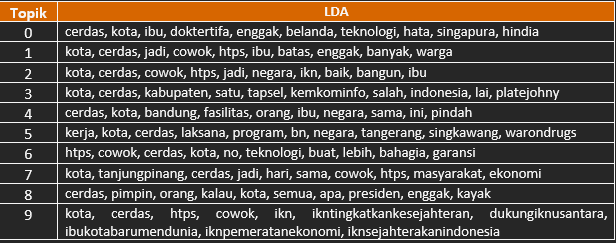

*It appears that topic modelling with the LDA model has many common words in each topic, namely the words "city" and "smart."  Comparison of each value on the topic with the LDA model, namely for the highest topic value of 580.5626 in Topic 210.*